<a href="https://colab.research.google.com/github/krutikacoding/twilearn-ds/blob/main/Krutika_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project 2: Google Play Store Data Analysis


---




## Import

In [ ]:
#packages import
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rc
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import chi2
import scipy.stats as stats
from scipy.stats import zscore
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold


In [ ]:
url= 'https://raw.githubusercontent.com/krutikacoding/twilearn-ds/main/Google%20Apps%20data.csv'
data= pd.read_csv(url)

## Reviewing Data

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design


In [ ]:
data.tail()

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
8271,8271,8912,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
8272,8272,8913,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
8273,8273,8914,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education
8274,8274,8915,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,NaN,"January 19, 2015",Varies with device,-1,Books & Reference
8275,8275,8916,iHoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307,19.0,10000000,Free,0.0,Others,"July 25, 2018",Varies with device,-1,Lifestyle


In [ ]:
data.shape

(8276, 15)

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews',
       'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Last Updated',
       'Current Ver', 'Minimum Android Ver', 'Genres'],
      dtype='object')

In [ ]:
data.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
App                     object
Category                object
Rating                 float64
Reviews                  int64
Size                   float64
Installs                 int64
Type                    object
Price                  float64
Content Rating          object
Last Updated            object
Current Ver             object
Minimum Android Ver     object
Genres                  object
dtype: object

In [ ]:
data.describe

<bound method NDFrame.describe of       Unnamed: 0.1  Unnamed: 0  \
0                0           0   
1                1           1   
2                2           5   
3                3           6   
4                4           7   
...            ...         ...   
8271          8271        8912   
8272          8272        8913   
8273          8273        8914   
8274          8274        8915   
8275          8275        8916   

                                                    App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       Art And Design   
1                                   Coloring book moana       Art And Design   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...       Art And Design   
3                                 Sketch - Draw & Paint       Art And Design   
4                 Pixel Draw - Number Art Coloring Book       Art And Design   
...                                                 ...                  ... 

## Cleaning Data

In [ ]:
data1 = data.head()
data2 = data.tail()
concat_data = pd.concat([data1,data2],axis=0,ignore_index=True)
concat_data

,Unnamed: 0.1,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,0,0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,1,1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,2,5,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,3,6,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,4,7,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
5,8271,8912,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
6,8272,8913,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
7,8273,8914,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education
8,8274,8915,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,NaN,"January 19, 2015",Varies with device,-1,Books & Reference
9,8275,8916,iHoroscope - 2018 Daily Horoscope & Astrology,Lifestyle,4.5,398307,19.0,10000000,Free,0.0,Others,"July 25, 2018",Varies with device,-1,Lifestyle


the first two rows seem unnecessary

In [ ]:
data.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace= True)

In [ ]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0.0,Others,"January 7, 2018",1.0.0,4.0.3,Art & Design
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0.0,Others,"January 15, 2018",2.0.0,4.0.3,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0.0,Others,"August 1, 2018",1.2.4,4.0.3,Art & Design
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0.0,Others,"June 20, 2018",1.1,4.4,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,FR Calculator,Family,4.0,7,2.6,500,Free,0.0,Others,"June 18, 2017",1.0.0,4.1,Education
8272,Sya9a Maroc - FR,Family,4.5,38,53.0,5000,Free,0.0,Others,"July 25, 2017",1.48,4.1,Education
8273,Fr. Mike Schmitz Audio Teachings,Family,5.0,4,3.6,100,Free,0.0,Others,"July 6, 2018",1.0,4.1,Education
8274,The SCP Foundation DB fr nn5n,Books And Reference,4.5,114,1.0,1000,Free,0.0,NaN,"January 19, 2015",Varies with device,-1,Books & Reference


‎


‎



‎



‎



‎

In [ ]:
data.isna().sum()

App                      0
Category                 0
Rating                   0
Reviews                  0
Size                     0
Installs                 0
Type                     0
Price                    0
Content Rating         361
Last Updated             0
Current Ver              0
Minimum Android Ver      0
Genres                   0
dtype: int64

However, this isn't an issue for the content rating section

In [ ]:
data["Content Rating"].value_counts()

Others    6982
Teen       933
Name: Content Rating, dtype: int64

In [ ]:
cat = data.Category.unique()
cat

array(['Art And Design', 'Auto And Vehicles', 'Beauty',
       'Books And Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food And Drink', 'Health And Fitness', 'House And Home',
       'Libraries And Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel And Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News And Magazines', 'Maps And Navigation'],
      dtype=object)

In [ ]:
data.dtypes

App                     object
Category                object
Rating                 float64
Reviews                  int64
Size                   float64
Installs                 int64
Type                    object
Price                  float64
Content Rating          object
Last Updated            object
Current Ver             object
Minimum Android Ver     object
Genres                  object
dtype: object

All datatypes seem to be appropriate and no conversion is required

‎






‎



‎

##Data Insights

Finding the apps with the least rating on play store

In [ ]:
#data[data['Rating'] == 0].head()
data['Rating'].min(axis=0)

1.0

In [ ]:
data[data['Rating'] == 1.0]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
502,House party - live chat,Dating,1.0,1,9.2,10,Free,0.00,NaN,"July 31, 2018",3.52,4.0.3,Dating
3163,Speech Therapy: F,Family,1.0,1,16.0,10,Paid,2.99,Others,"October 7, 2016",1.0,2.3.3,Education
4010,Clarksburg AH,Medical,1.0,1,28.0,50,Free,0.00,Others,"May 1, 2017",300000.0.81,4.0.3,Medical
4661,Truck Driving Test Class 3 BC,Family,1.0,1,2.0,50,Paid,1.49,Others,"April 9, 2012",1.0,2.1,Education
4924,BJ Bridge Standard American 2018,Game,1.0,1,4.9,1000,Free,0.00,Others,"May 21, 2018",6.2-sayc,4.0,Card
5044,MbH BM,Medical,1.0,1,2.3,100,Free,0.00,Others,"December 14, 2016",1.1.3,4.3,Medical
5495,CB Mobile Biz,Finance,1.0,3,8.4,500,Free,0.00,Others,"February 22, 2016",4.4.1255,4.0,Finance
5637,Thistletown CI,Productivity,1.0,1,6.6,100,Free,0.00,Others,"March 15, 2018",41.9,4.1,Productivity
5666,CJ DVD Rentals,Communication,1.0,5,13.0,100,Free,0.00,Others,"October 6, 2017",1.0,4.1,Communication
5974,CR Magazine,Business,1.0,1,7.8,100,Free,0.00,Others,"July 23, 2014",2.4.2,2.3.3,Business


‎


‎


‎



‎

Finding the apps with the least rating on play store

In [ ]:
data['Rating'].max(axis=0)

5.0

In [ ]:
data[data['Rating'] == 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Minimum Android Ver,Genres
280,Hojiboy Tojiboyev Life Hacks,Comics,5.0,15,37.0,1000,Free,0.0,Others,"June 26, 2018",2.0,4.0.3,Comics
495,American Girls Mobile Numbers,Dating,5.0,5,4.4,1000,Free,0.0,NaN,"July 17, 2018",3.0,4.0.3,Dating
497,Awake Dating,Dating,5.0,2,70.0,100,Free,0.0,NaN,"July 24, 2018",2.2.9,4.4,Dating
503,Spine- The dating app,Dating,5.0,5,9.3,500,Free,0.0,Teen,"July 14, 2018",4.0,4.0.3,Dating
505,Girls Live Talk - Free Text and Video Chat,Dating,5.0,6,5.0,100,Free,0.0,NaN,"August 1, 2018",8.2,4.0.3,Dating
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8194,Mad Dash Fo' Cash,Game,5.0,14,16.0,100,Free,0.0,Others,"June 19, 2017",2.5a,4.1,Arcade
8211,GKPB FP Online Church,Lifestyle,5.0,32,7.9,1000,Free,0.0,Others,"December 31, 2017",0.7.1,4.4,Lifestyle
8229,Monster Ride Pro,Game,5.0,1,24.0,10,Free,0.0,Others,"March 5, 2018",2.0,2.3,Racing
8263,Fr. Daoud Lamei,Family,5.0,22,8.6,1000,Free,0.0,Teen,"June 27, 2018",3.8.0,4.1,Education


‎


‎


‎



‎

In [ ]:
data[data['Rating'] == 5.0].count()

App                    271
Category               271
Rating                 271
Reviews                271
Size                   271
Installs               271
Type                   271
Price                  271
Content Rating         261
Last Updated           271
Current Ver            271
Minimum Android Ver    271
Genres                 271
dtype: int64

Therefore, there are 271 apps with a 5.0/5.0 rating.

## Data Analysis and Visualisation

In [ ]:
data.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.059430,0.041181,0.042372,-0.021316
Reviews,0.059430,1.000000,0.056789,0.611471,-0.008080
Size,0.041181,0.056789,1.000000,-0.005860,-0.017899
Installs,0.042372,0.611471,-0.005860,1.000000,-0.009859
Price,-0.021316,-0.008080,-0.017899,-0.009859,1.000000


‎

‎



‎

Preparing correlation heatmap

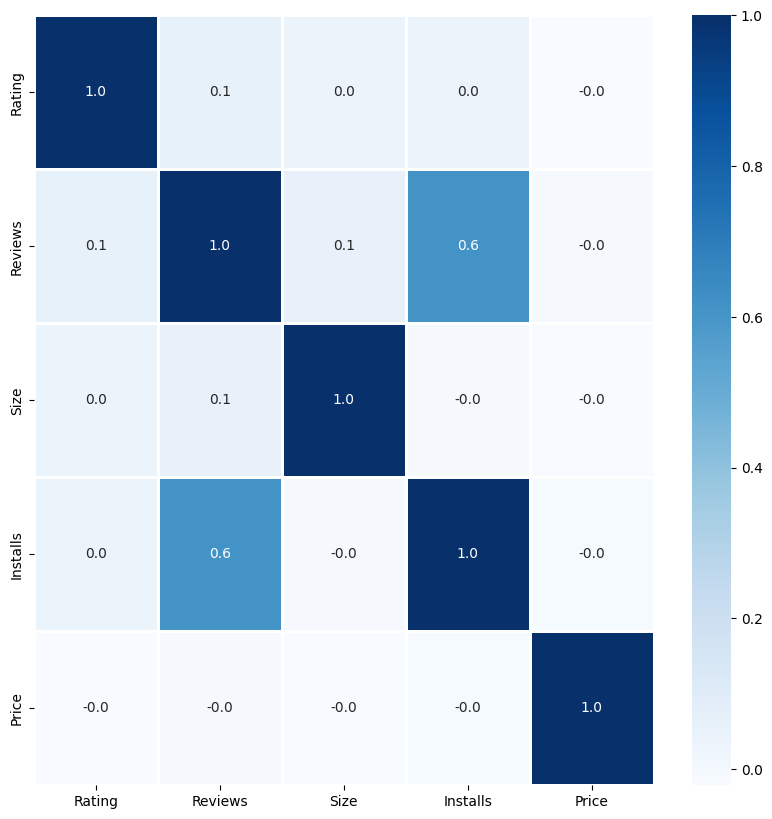

In [ ]:

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=1, fmt= '.1f', cmap="Blues")
plt.show()



‎

‎ ‎

‎

‎

‎
‎


‎

‎

Finding the most popular app category

<Axes: xlabel='Category'>

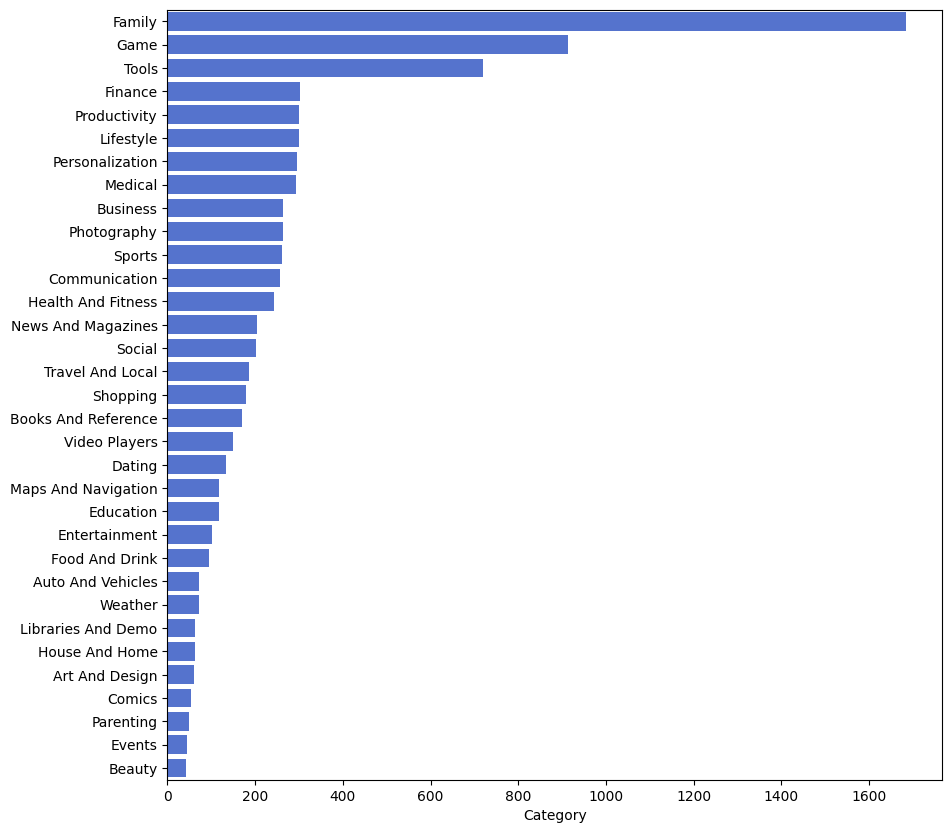

In [ ]:

plt.figure(figsize=(10,10))
most_cat = data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=data, palette=['royalblue'])


‎

‎


‎


‎

‎

In [ ]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

all values seem appropriate

‎
‎


‎



‎



‎



‎

<Axes: xlabel='Rating', ylabel='Density'>

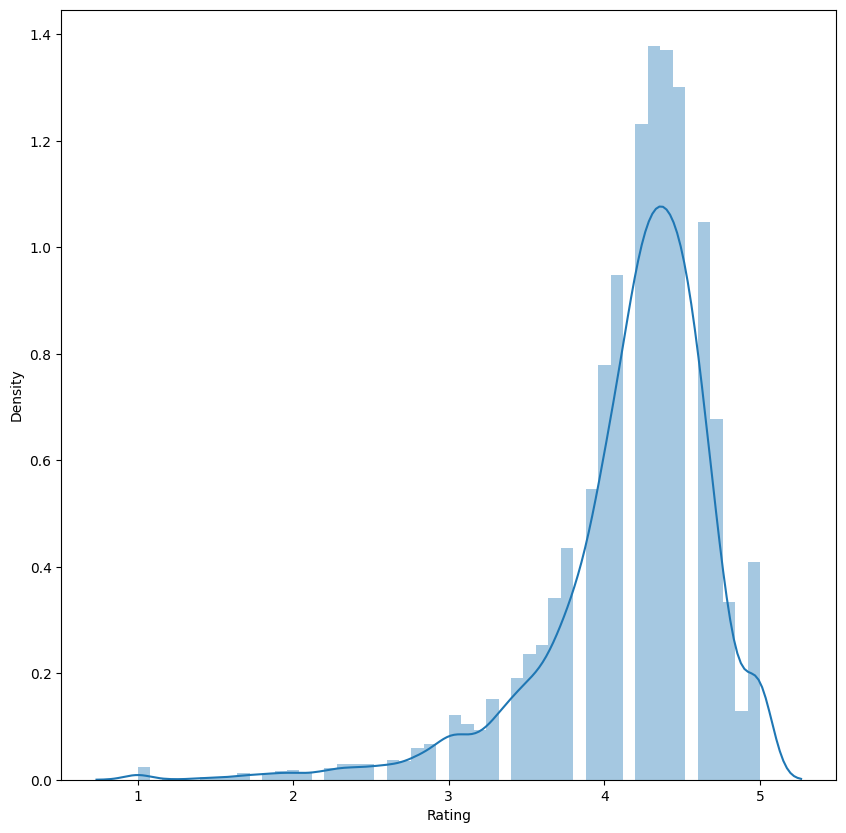

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data.Rating)

‎


‎



‎



‎

‎

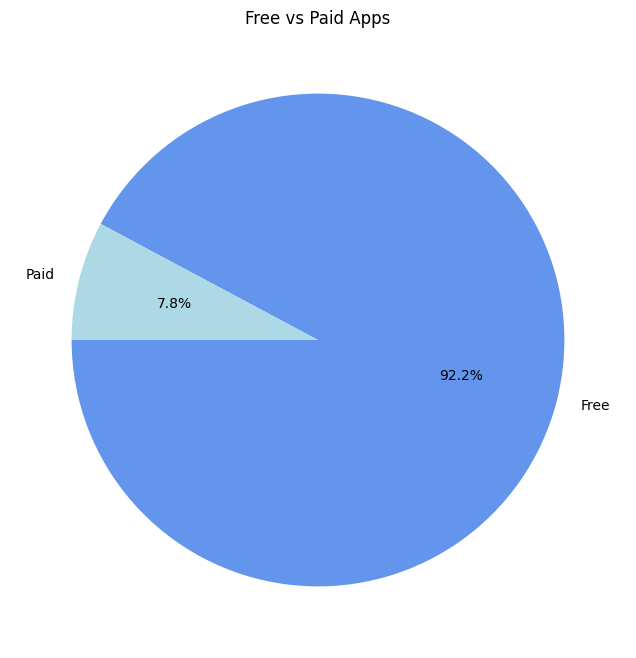

In [ ]:
size=[8895,753]
sentiment = ['Free', 'Paid']
plt.figure(figsize=(8,8))
plt.pie(size, labels=sentiment, colors=['cornflowerblue', 'lightblue'], startangle=180, autopct='%.1f%%')
plt.title('Free vs Paid Apps')
plt.show()

‎


‎



‎



‎

‎


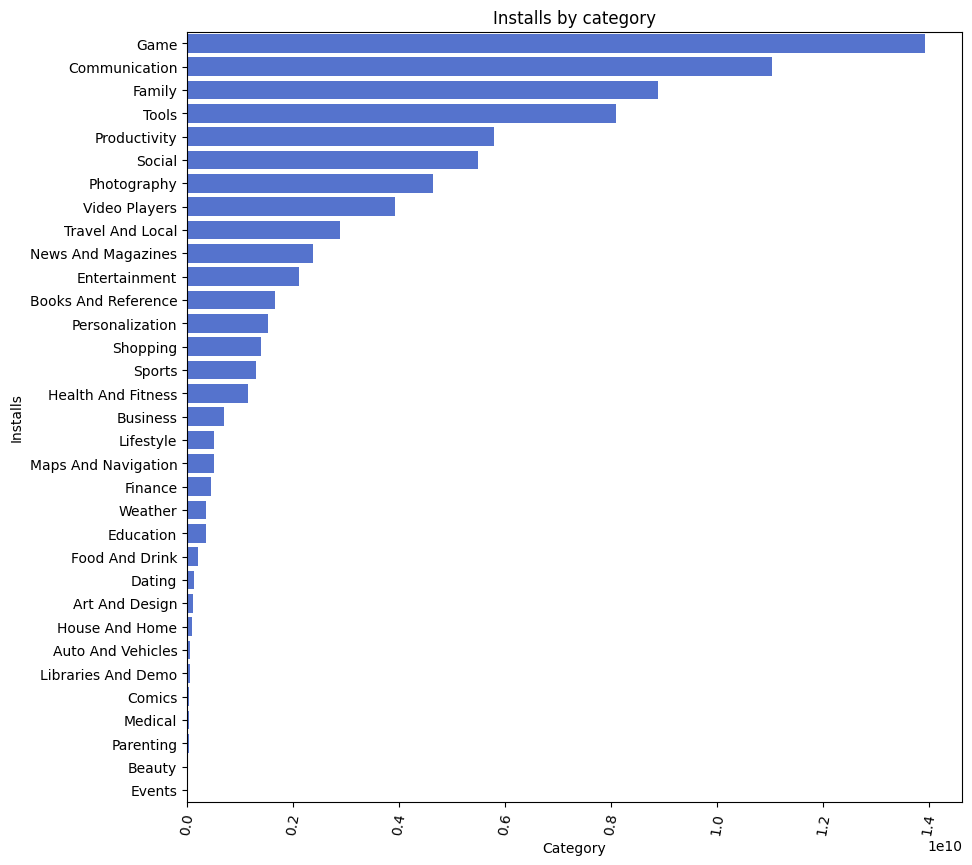

In [ ]:
plt.figure(figsize=(10,10))
sum_rew = data.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=data, palette= ['royalblue'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Installs by category")
plt.show()

‎


‎


‎




‎




‎

Viewing reviews by category

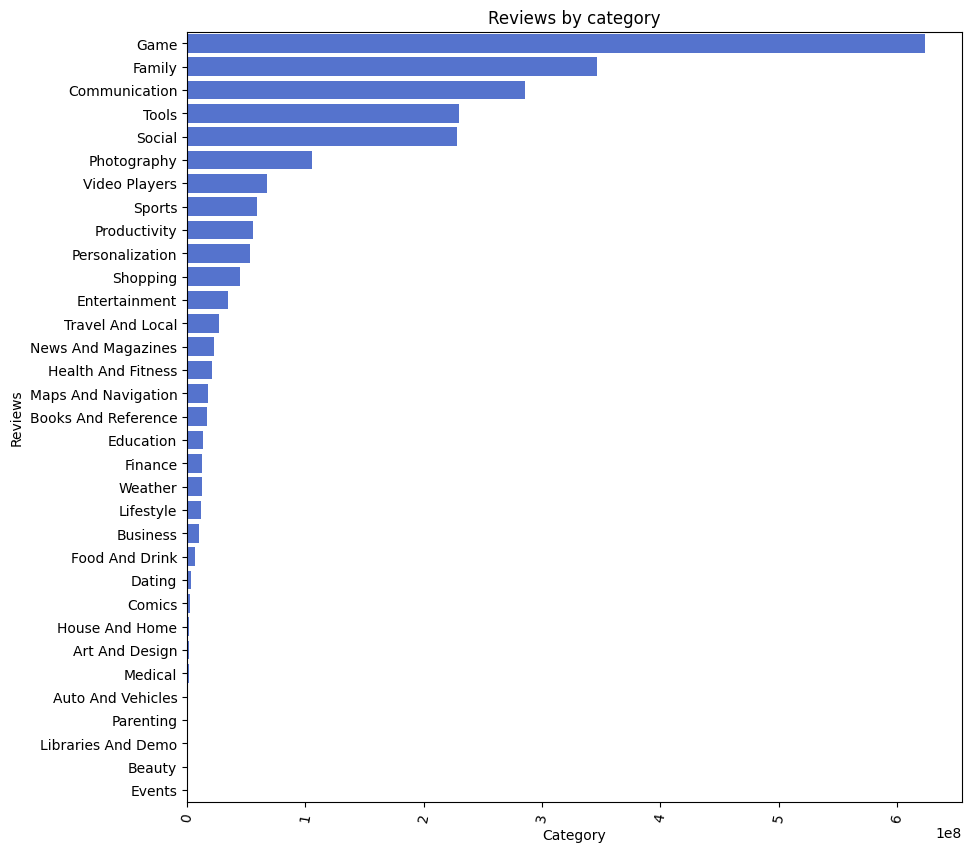

In [ ]:
plt.figure(figsize=(10,10))
sum_rew = data.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
sns.barplot(x=sum_rew, y=sum_rew.index, data=data, palette= ['royalblue'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Reviews by category")
plt.show()

‎


‎



‎



‎



‎

‎



‎



‎



‎


‎


Comparing the size of apps in paid and free versions

In [ ]:
data.groupby("Type").describe()["Size"]

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7672.0,18.931883,22.374045,0.00830,2.9,9.60,27.00,100.0
Paid,604.0,18.464349,22.421981,0.01367,1.8,7.95,27.25,100.0


<Axes: xlabel='Type', ylabel='Size'>

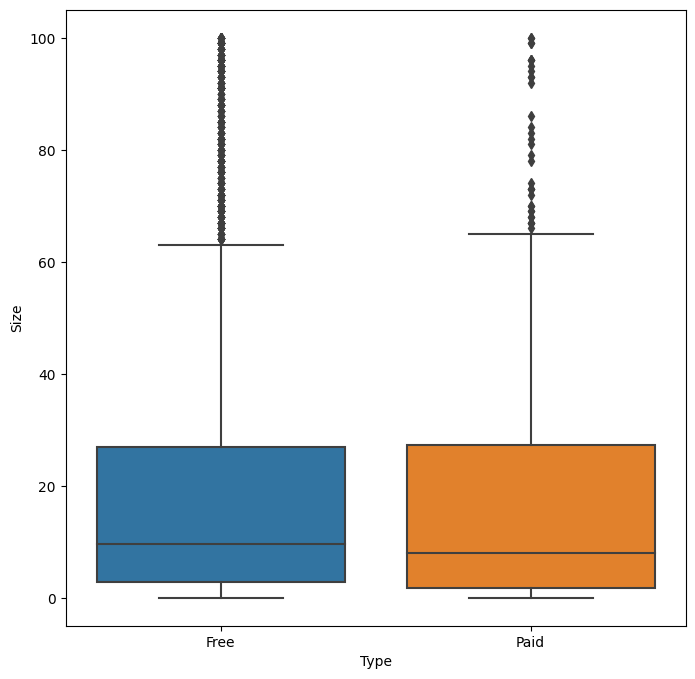

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x = "Type", y = "Size", data = data)

‎
‎



‎




‎



‎